<a href="https://colab.research.google.com/github/HIDDENDEN/Math_models/blob/main/MyWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing template ...


In [1]:
# !cp "drive/My Drive/Science_res/TestClass.py" .
# import TestClass


In [2]:
# test = TestClass.Vehicle(1,1,1)

In [3]:
# print(test.brake())

import my classes

In [4]:
!cp "drive/My Drive/Science_res/At.py" .
import At

!cp "drive/My Drive/Science_res/Fiu.py" .
import Fiu

!cp "drive/My Drive/Science_res/Alphax.py" .
import Alphax

!cp "drive/My Drive/Science_res/Kcit.py" .
import Kcit


initialize functions

In [5]:
a_t = At.A_t()
kci_t = Kcit.Kci_t()
fi_u = Fiu.Fi_t()
alpha_x = Alphax.Alpha_x()

Import needed libs

In [6]:
import numpy as np
np.set_printoptions(linewidth=np.inf)# no extra newlines in output


Set steps size of X axys and T axys


And *x_0* , *t_0*

In [7]:
# Test L = 1 and T = 1
# Test num_of_steps N_x = 10 , N_t = 10
L = 1
T = 1
N_x = 10
N_t = 10

h_x = L/N_x
h_t = T/N_t

#Test segment 0 <= x <= 1
#Test segment 0 <= t <= 1

x_0 = 0
t_0 = 0

**Initialize two dim matrix for data storage**

In [8]:
matrix = np.zeros((N_x + 1,N_t + 1))

**Filling matrix with border conditions**

In [9]:
# First row filled with alpha(x_j)
for j in range(0, N_x+1):
  matrix[0][j] = alpha_x.compute(x_0 + h_x*j)

# First colomn filled with kci(t_i)
for i in range(0, N_t+1):
  matrix[i][0] = kci_t.compute(t_0 + h_t*i)

print(matrix)

[[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.3 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.4 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.6 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.7 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.8 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.9 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]]


*Define function for matrix computing*

In [10]:
# def calculate_node(i,j,const_steps,x_i,t_j,matrix):
  # return (const_steps * (matrix[i][j-1]/h_t + matrix[i-1][j]/h_x - a_t.compute(t_j-h_t)*fi_u.compute(matrix[i-1][j-1]) ) )
def calculate_node(i, j, h_x, h_t, x_i, t_j, matrix):
  return (h_t * ( ( 1/h_x )*matrix[i-1][j] - (1/h_x - 1/h_t)*matrix[i][j] - a_t.compute(t_j)*fi_u.compute(matrix[i][j]) ) )


**Compute whole matrix**

In [11]:
# Let 1/((1/h_t) + (1/h_x)) be written as const_steps
# const_steps = 1/(1/h_t + 1/h_x)

for i in range(0, (N_t - 1) + 1):   # t defines rows
  for j in range(1, (N_x) + 1):     # x defines colomns
    matrix[i+1][j] = round( calculate_node(i,j, h_x, h_t, x_0+h_x*j, t_0 + h_t*i,matrix) ,3) # round 3 digits after comma

print(matrix)

[[ 0.     0.1    0.2    0.3    0.4    0.5    0.6    0.7    0.8    0.9    1.   ]
 [ 0.1   -0.01  -0.02  -0.03  -0.04  -0.05  -0.06  -0.07  -0.08  -0.09  -0.1  ]
 [ 0.2    0.101  0.202  0.303  0.404  0.505  0.606  0.707  0.808  0.909  1.01 ]
 [ 0.3   -0.02  -0.04  -0.06  -0.08  -0.1   -0.121 -0.141 -0.161 -0.181 -0.201]
 [ 0.4    0.103  0.206  0.309  0.412  0.515  0.618  0.721  0.824  0.927  1.03 ]
 [ 0.5   -0.03  -0.061 -0.091 -0.121 -0.152 -0.183 -0.213 -0.243 -0.274 -0.304]
 [ 0.6    0.106  0.212  0.318  0.424  0.53   0.636  0.742  0.848  0.954  1.06 ]
 [ 0.7   -0.041 -0.082 -0.123 -0.163 -0.205 -0.247 -0.287 -0.328 -0.369 -0.41 ]
 [ 0.8    0.11   0.22   0.33   0.44   0.551  0.661  0.771  0.881  0.991  1.101]
 [ 0.9   -0.052 -0.104 -0.156 -0.207 -0.26  -0.313 -0.364 -0.416 -0.468 -0.52 ]
 [ 1.     0.115  0.23   0.346  0.461  0.577  0.692  0.807  0.923  1.038  1.153]]


In [12]:
# print((matrix[:][1]))
# print((matrix[:][1])[3])

**Drawing section**

In [13]:
# We'll draw using matplot lib
# importing the library 
import matplotlib.pyplot as plt  


*Drawing for U(x, t_const)*

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


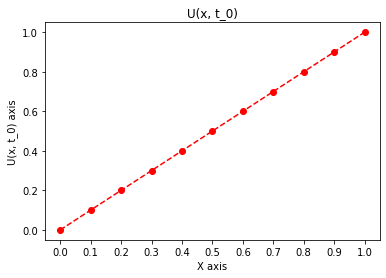

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


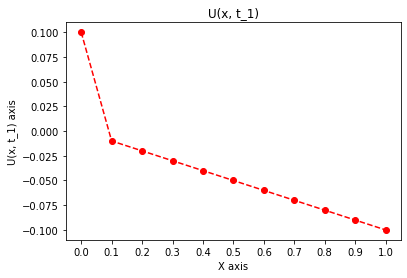

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


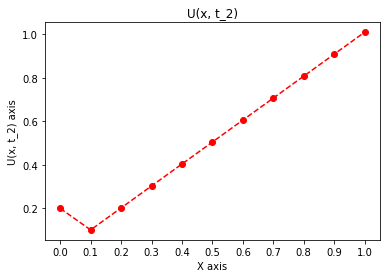

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


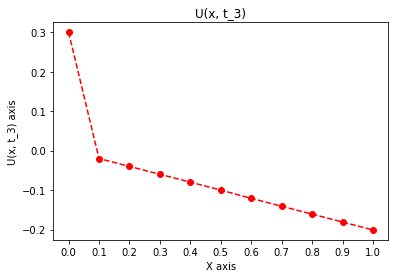

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


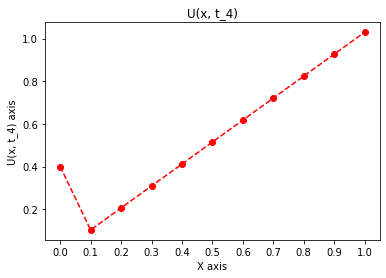

In [16]:
#data to be plotted
x = np.arange(x_0, x_0 + (N_x + 1)*h_x, h_x)

#set starting iteration ( i ) for t_i
#(selecting rows)
startIterationFor_t_i = 0
#set what num of first from t_i you want to display
num_of_graphs_rows = 5

for startIterationFor_t_i in range(num_of_graphs_rows):
  u = matrix[startIterationFor_t_i]
  #plotting
  plt.title("U(x, t_"+str(startIterationFor_t_i)+")")
  plt.xlabel("X axis")
  plt.ylabel("U(x, t_" +str(startIterationFor_t_i)+") axis")
  #show all x values
  plt.xticks(x)
  #set y axis fixed size
  axes = plt.axes()
  # axes.set_ylim([0, 4])
  #draw
  plt.plot(x,u, linestyle='--', marker='o', color = "red")
  plt.show()



*Drawing for U(x_const, t)*

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


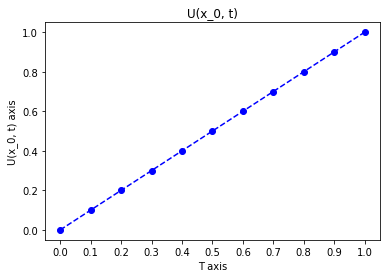

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


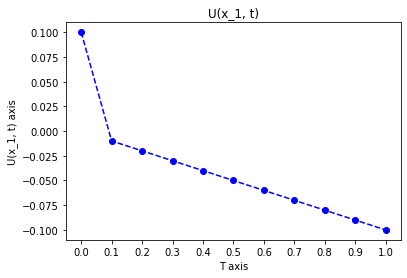

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


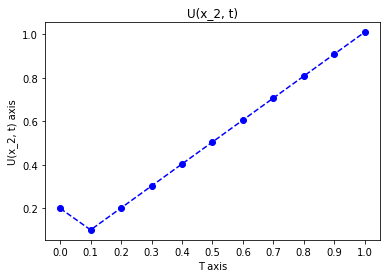

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


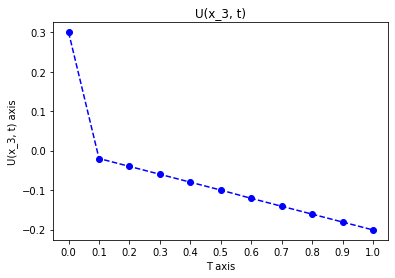

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


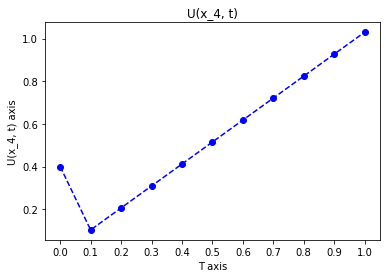

In [17]:
#data to be plotted
t = np.arange(t_0, t_0 + (N_t + 1)*h_t, h_t)

#set starting iteration ( j ) for x_j
#(selecting colomns)
startIterationFor_x_j = 0
#set what num of first from x_j you want to display
num_of_graphs_coloms = 5


for startIterationFor_x_j in range(num_of_graphs_coloms):
  u = matrix[:][startIterationFor_x_j]
  #plotting
  plt.title("U(x_"+str(startIterationFor_x_j)+", t)")
  plt.xlabel("T axis")
  plt.ylabel("U(x_" +str(startIterationFor_x_j)+", t) axis")
  #show all x values
  plt.xticks(t)
  #set y axis fixed size
  axes = plt.axes()
  # axes.set_ylim([0, 4])
  #draw
  plt.plot(x,u, linestyle='--', marker='o', color = "blue")
  plt.show()